In [14]:
import os
import json
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.rcParams['figure.figsize'] = [6.9,2.3]

import numpy as np

In [15]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
# matplotlib.rcParams['lines.marker']  #None
matplotlib.rcParams['lines.markersize'] = 2 #6.0
matplotlib.rcParams['lines.linewidth'] = 1   # 1.5
matplotlib.rcParams['figure.constrained_layout.use'] = True

In [16]:
def show_result_distance(distance, accuracy, 
                        target_png_path=None, title = "", guessing_level_percent=None,
                        ax=None, label="Test accuracy",
                        plot_legend=True, color=None):
    """
    This method plots the end result for the main_distance script.
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    # Set the grid
    max_distance = np.max(distance)
    ax.set_ylim([20, 100])
    ax.set_xlim([-0.1, max_distance + 1])

    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.yaxis.set_major_locator(MultipleLocator(20))

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    axesthickness = 1

    ax.xaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=3, width=axesthickness, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=2, width=axesthickness, direction='in', right='on')

    ax.grid(which='major', color='#CCCCCC')
    ax.grid(which='minor', color='#CCCCCC')
    
    print(f'{distance=}, {accuracy=}')
    if label.lower().startswith("test"):
        average_test_acc = np.mean(accuracy, axis=1)
        ax.plot(distance, average_test_acc, "--", color=color if color else "#01665eff") #, label=f"avg. {label}")

        distance = np.repeat(distance.reshape((len(distance), 1)), accuracy.shape[1], axis=1)
        line = ax.plot(distance.flatten(), accuracy.flatten() , label=label, marker='o', 
                       color=color if color else "#01665eff", markersize=2, linestyle="")
    else:
        line = ax.plot(distance.flatten(), accuracy.flatten() , label=f"{label}", marker='o', 
                       color=color if color else "#8c510aff", markersize=2, linestyle="")
    if guessing_level_percent:
        # Adds the 25% (or 50%) accuracy line
        guessing = np.full((1000, 1), guessing_level_percent)
        ax.plot(guessing, color="black", label="", linewidth=.2)

    if plot_legend:
        ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True)
    
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Distance (cm)")
    ax.yaxis.set_ticks([0,25,40,60,80,100])
    #ax.set_title(title)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axesthickness)

    # increase tick width
    ax.tick_params(width=axesthickness)

    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}

    plt.rc('font', **font)
    
    if target_png_path:
        plt.savefig(target_png_path)
        
    return line # to allow manual legend plotting
    
def convert_data(dictonary):
    accuracy = np.array(list(dictonary.values())) * 100
    distances_from_keys = list(dictonary.keys())
    distances_from_keys = [float(re.findall("\d+", i)[0]) for i in distances_from_keys]
    
    return np.array(distances_from_keys), accuracy

In [17]:
def load_plotinfo_from_file(json_path):
    with open(os.path.join(json_path), 'r') as file:
        json_contents = json.load(file)
        dict_test_accuracies = json_contents["test_accuracies"]
        dict_val_accuracies = json_contents["validation_accuracies"]
        try:
            n_classes = json_contents['n_classes']
        except:
            print(f"Warning. Failed to interpret n_classes from json file! Set to default.")
            n_classes = 0
        guessing_level_percent = 50 if n_classes == 2 else 25

    title = ""#f"Information in the Distance ({n_classes} classes) from {path}"
    return dict_test_accuracies, dict_val_accuracies, guessing_level_percent, title

# Single graph

In [18]:
raw_std_json_path = os.path.join("result_files", "data_raw_std_20221201-1646.json")
with open(os.path.join(raw_std_json_path), 'r') as file:
    json_contents = json.load(file)
    std_data = json_contents["std_probe_signal"]
    
std_data_to_plot_mV = {}
for k in sorted(std_data.keys(), key=lambda kk: int(re.findall("(\d+)cm", kk)[0])):
    std_data_to_plot_mV[int(re.findall("(\d+)cm", k)[0])] = 1e3 * std_data[k]  # V to mV conversion!
    
print(std_data_to_plot_mV)

{0: 3.2508639295347765, 1: 1.0394170534642846, 2: 0.8055547641463793, 3: 0.7235330210126231, 4: 0.7095926218008161, 5: 0.6510637229621891, 6: 0.6143166076452793, 7: 0.6169434201642527, 8: 0.6619368137757553, 9: 0.5461788852817578, 10: 0.5827838969380542, 11: 0.5285320480707273, 12: 0.5102933333857654}


In [19]:
path = os.path.join("result_files", "result_TEMPEST_20230111-1723.json")

dict_test_accuracies, dict_val_accuracies, guessing_level_percent1, title1 = load_plotinfo_from_file(path)

0cm: mean best percentile = [1.0, 1.0, 1.0]
1cm: mean best percentile = [0.9540816326530612, 0.9489795918367347, 0.9438775510204082]
2cm: mean best percentile = [0.6683673469387754, 0.6989795918367346, 0.7346938775510203]
3cm: mean best percentile = [0.5612244897959183, 0.5153061224489796, 0.4693877551020408]
4cm: mean best percentile = [0.5459183673469388, 0.44387755102040816, 0.5]
5cm: mean best percentile = [0.3520408163265306, 0.3673469387755102, 0.3928571428571429]
6cm: mean best percentile = [0.29591836734693877, 0.3673469387755102, 0.2857142857142857]
7cm: mean best percentile = [0.37244897959183676, 0.3010204081632653, 0.3214285714285714]
8cm: mean best percentile = [0.28061224489795916, 0.3112244897959184, 0.326530612244898]
9cm: mean best percentile = [0.2209576138147567, 0.32256235827664403, 0.4489795918367347]
10cm: mean best percentile = [nan, nan, nan]
11cm: mean best percentile = [nan, nan, nan]
12cm: mean best percentile = [0.29081632653061223, nan, 0.23979591836734693]

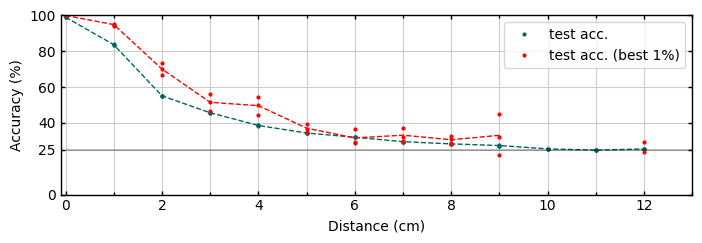

In [20]:
fig, ax = plt.subplots()

distances = []
test_accuracies = []
percentile_accuracies = []

for k in dict_test_accuracies.keys():
    distances.append(float(re.findall("\d+", k)[0]))
    test_accuracies.append( [v['test_accuracy'] for v in dict_test_accuracies[k]])
    symbolmean_bestpercentile_accs = [
        np.mean(list(v['best_0.01_eq_label_proportions'].values())) 
         for v in dict_test_accuracies[k]
    ]
    print(f'{k}: mean best percentile = {symbolmean_bestpercentile_accs}')
    percentile_accuracies.append(symbolmean_bestpercentile_accs)
    
line1 = show_result_distance(
    np.array(distances), 100*np.array(test_accuracies), 
    title=title1,
    guessing_level_percent=guessing_level_percent1,
    ax=ax, label='test acc.', plot_legend=False
)

# don't plot validation acc. because it's basically equal to test acc.
line2 = show_result_distance(
    np.array(distances),
    100*np.array(percentile_accuracies),
    title=title1, 
    guessing_level_percent=guessing_level_percent1, 
    ax=ax, label='test acc. (best 1%)', plot_legend=True, color='red'
)

ax.set_ylim(0, 100)

plt.savefig('./distance_best_percentile.pdf')

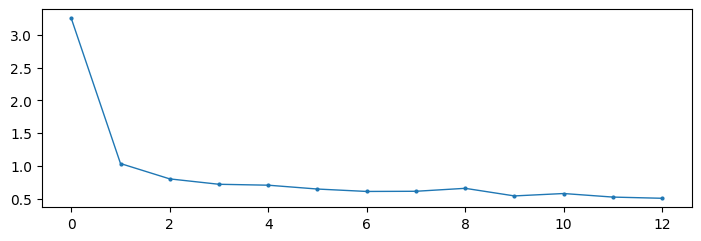

In [21]:
plt.plot(std_data_to_plot_mV.keys(), std_data_to_plot_mV.values(), 'o-', label="probe signal")

In [22]:
print(std_data_to_plot_mV.keys(), std_data_to_plot_mV.values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) dict_values([3.2508639295347765, 1.0394170534642846, 0.8055547641463793, 0.7235330210126231, 0.7095926218008161, 0.6510637229621891, 0.6143166076452793, 0.6169434201642527, 0.6619368137757553, 0.5461788852817578, 0.5827838969380542, 0.5285320480707273, 0.5102933333857654])
